In [11]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_file = "city_data.csv"
ride_file = "ride_data.csv"

In [14]:
# Read the City and Ride Data
city_file_pd = pd.read_csv(city_file)
ride_file_pd = pd.read_csv(ride_file)

#city_file_pd
#ride_file_pd

In [16]:
# Combine the data into a single dataset
city_ride= pd.merge(city_file_pd,ride_file_pd,on="city")
city_ride= citymerge_df.drop_duplicates()

# Display the data table for preview
city_ride.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [18]:
average_fare = city_ride.groupby("city")["fare"].mean()
average_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [19]:
total_rides = city_ride.groupby("city")["ride_id"].count()
total_rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [22]:
#Find the total number of drivers per city.

total_drivers = city_ride.groupby("city")["driver_count"].mean()
total_drivers.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [24]:
#City Count by type
city_type = city_file_pd.set_index('city')['type']
city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [25]:
pyber_cities = pd.DataFrame({"Average Fare per City":average_fare,
                 "Number of Rides": total_rides,
                 "Number of Drivers": total_drivers,
                 "City Type": city_type
})
pyber_cities.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [27]:
#Urban
urban = pyber_cities.loc[pyber_cities["City Type"]== "Urban"]

#suburban
suburban = pyber_cities.loc[pyber_cities["City Type"]== "Suburban"]

#rural
rural = pyber_cities.loc[pyber_cities["City Type"]== "Rural"]

## Bubble Plot of Ride Sharing Data

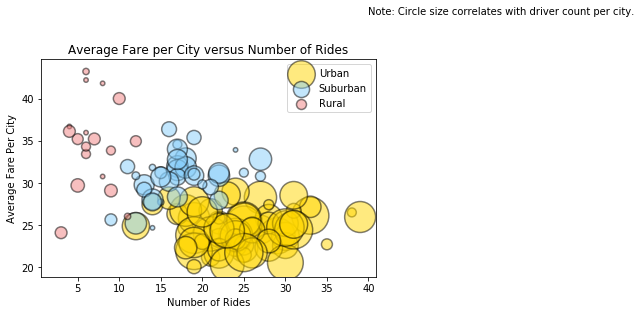

In [29]:
#Urban
plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], color = "gold", edgecolors="black", s = urban["Number of Drivers"]*20, label = "Urban", alpha = 0.5, linewidth = 1.5)

#Suburban
plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], color = "lightskyblue", edgecolors ="black", s = suburban["Number of Drivers"]*20, label = "Suburban", alpha = 0.5, linewidth = 1.5)

#Rural
plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], color = "lightcoral", edgecolors = "black", s = rural["Number of Drivers"]*20, label = "Rural", alpha = 0.5, linewidth = 1.5)

#Add title, x axis label and y axis label.
plt.title("Average Fare per City versus Number of Rides")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare Per City")
plt.text(40, 50,"Note: Circle size correlates with driver count per city.")

#Add the legend.
plt.legend(loc= "upper right")

#Show plot.
plt.show()



## Total Fares by City Type

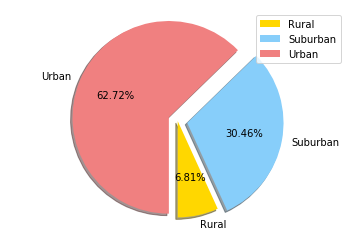

In [43]:
#Sum of fares
city_fare = city_ride.groupby(["type"])["fare"].sum()
city_fare_pie.index

colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.0,0.1, 0.1)

plt.pie(city_fare_pie, labels = city_fare.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 270)
plt.axis("equal")
plt.legend(loc = "upper right")
plt.show()

## Total Rides by City Type

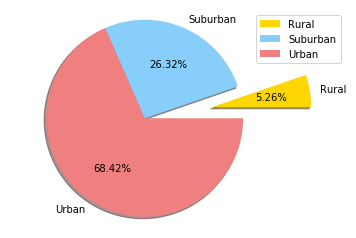

In [47]:
# Calculate Ride Percents
city_rides = city_ride.groupby(["type"])["ride_id"].count()
city_rides

city_rides.index

colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.7,0,0)


plt.pie(city_rides_pie, labels = city_rides.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True)
plt.axis("equal")
plt.legend(loc = "upper right")
plt.show()

## Total Drivers by City Type

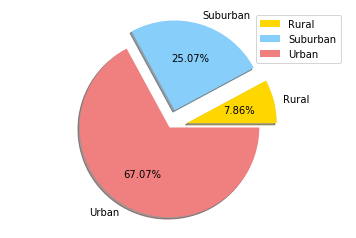

In [48]:

city_drivers = city_ride.groupby(["type"])["driver_count"].mean()
city_drivers.index

colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.2,0.2,0)
plt.pie(city_drivers, labels = city_fare.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True)
plt.axis("equal")
plt.legend(loc = "upper right")
plt.show()
